<a href="https://colab.research.google.com/github/Manya126/Machine-learning-tut/blob/main/callback_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical discussion of Callback functions:
A callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference.TensorBoard to visualize training progress and results with TensorBoard, or tf.keras.callbacks. ModelCheckpoint to periodically save your model during training. This callback reduces the learning rate when a metric you've mentioned during training eg. accuracy or loss has stopped improving. Models often benefit from reducing the learning rate.There are many callback functions,

- Early Stopping callback
- Model checkpointing callback
- Tensorboard callback Functions


We will also see how to save a model & load as well.

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.18.0
Keras Version 3.8.0


# GPU / CPU Check

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using keras on MNIST data

In [6]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
len(X_test[1][0])

28

In [10]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [11]:
len(X_train_full[5000:] )

55000

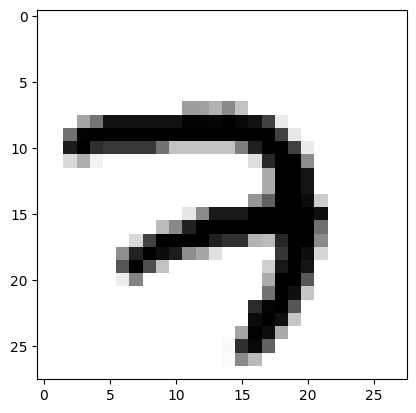

In [12]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

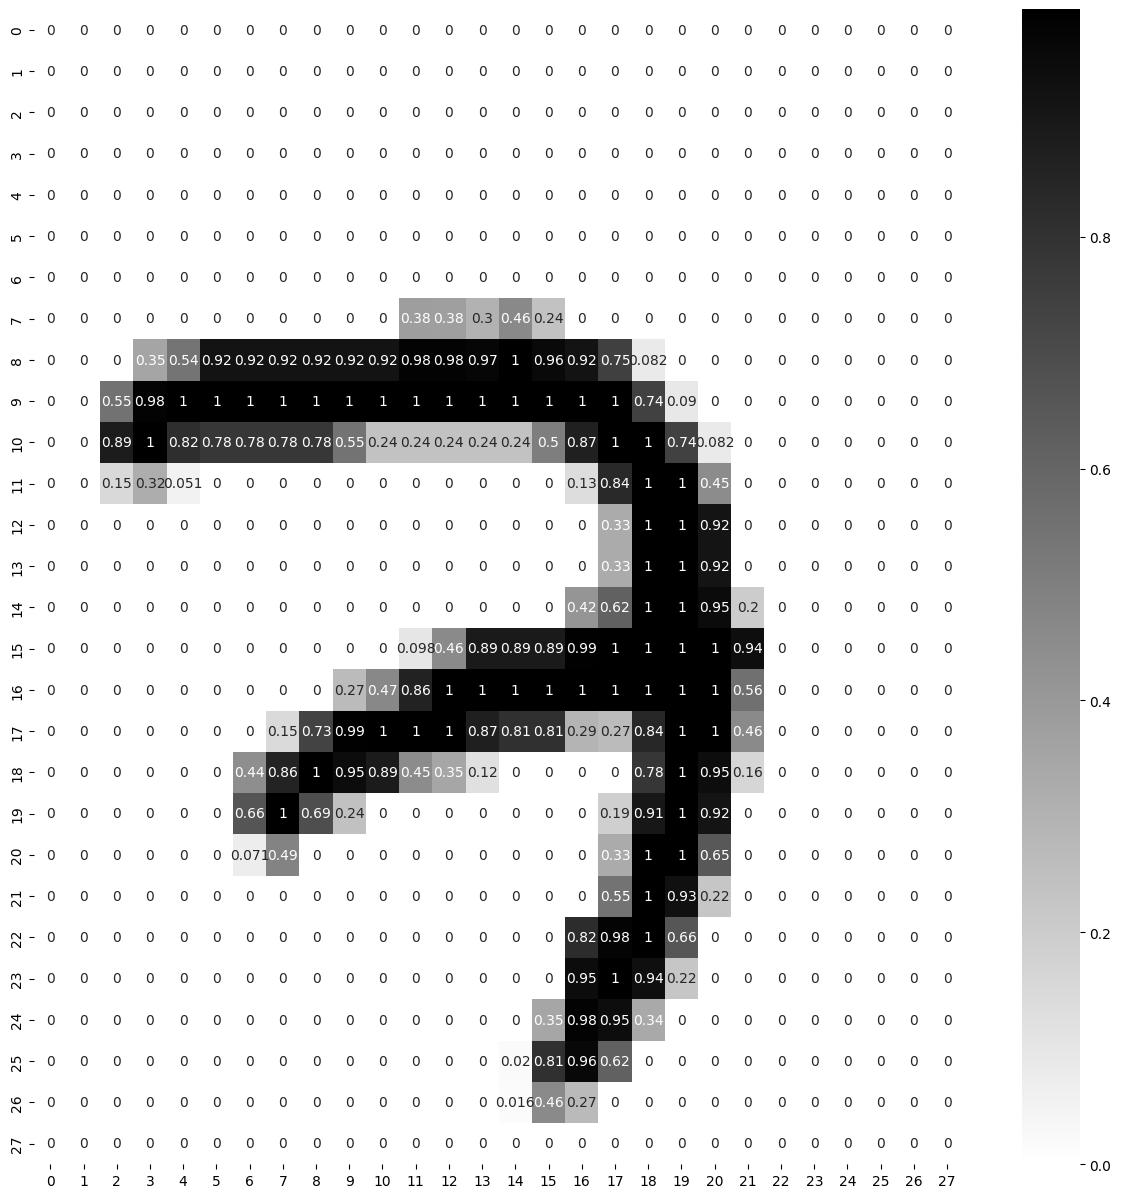

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [16]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [18]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [19]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [21]:
len(hidden1.get_weights()[1])

300

In [22]:
hidden1.get_weights()

[array([[-0.04979278,  0.05856338,  0.02657536, ..., -0.06664281,
          0.03443735, -0.05925163],
        [ 0.01001108, -0.06177836, -0.05987308, ...,  0.00108795,
          0.03693034,  0.00623471],
        [ 0.02899358,  0.04270491,  0.04362735, ..., -0.06503227,
          0.02991347,  0.05075224],
        ...,
        [-0.0680696 ,  0.07027236, -0.03520673, ..., -0.05095709,
         -0.03774779,  0.01260684],
        [ 0.04631282,  0.06107046, -0.04414134, ..., -0.00329149,
          0.00817103,  0.01724315],
        [ 0.00888686, -0.01786879, -0.01545934, ...,  0.02162122,
          0.0722596 , -0.0084125 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.04979278,  0.05856338,  0.02657536, ..., -0.06664281,
         0.03443735, -0.05925163],
       [ 0.01001108, -0.06177836, -0.05987308, ...,  0.00108795,
         0.03693034,  0.00623471],
       [ 0.02899358,  0.04270491,  0.04362735, ..., -0.06503227,
         0.02991347,  0.05075224],
       ...,
       [-0.0680696 ,  0.07027236, -0.03520673, ..., -0.05095709,
        -0.03774779,  0.01260684],
       [ 0.04631282,  0.06107046, -0.04414134, ..., -0.00329149,
         0.00817103,  0.01724315],
       [ 0.00888686, -0.01786879, -0.01545934, ...,  0.02162122,
         0.0722596 , -0.0084125 ]], dtype=float32)

In [25]:
print("shape\n", biases.shape)

shape
 (300,)


In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


# Tensorboard callback Functions

In [27]:
# Logging

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2025_06_05_08_53_53


# Early Stopping callback

In [28]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model checkpointing callback

In [29]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [30]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7361 - loss: 1.0086

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7362 - loss: 1.0083 - val_accuracy: 0.9138 - val_loss: 0.3099
Epoch 2/30
1706/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.3020

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9136 - loss: 0.3019 - val_accuracy: 0.9360 - val_loss: 0.2367
Epoch 3/30
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9304 - loss: 0.2485

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9304 - loss: 0.2484 - val_accuracy: 0.9450 - val_loss: 0.2012
Epoch 4/30
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - loss: 0.2043

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9421 - loss: 0.2043 - val_accuracy: 0.9500 - val_loss: 0.1759
Epoch 5/30
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1841

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9484 - loss: 0.1841 - val_accuracy: 0.9568 - val_loss: 0.1563
Epoch 6/30
1708/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1624

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9535 - loss: 0.1624 - val_accuracy: 0.9612 - val_loss: 0.1433
Epoch 7/30
1707/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1421

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9586 - loss: 0.1421 - val_accuracy: 0.9632 - val_loss: 0.1349
Epoch 8/30
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9645 - loss: 0.1273

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9645 - loss: 0.1273 - val_accuracy: 0.9668 - val_loss: 0.1225
Epoch 9/30
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.1161

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9672 - loss: 0.1161 - val_accuracy: 0.9692 - val_loss: 0.1169
Epoch 10/30
1705/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.1090

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9694 - loss: 0.1090 - val_accuracy: 0.9722 - val_loss: 0.1101
Epoch 11/30
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.1007

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9713 - loss: 0.1007 - val_accuracy: 0.9726 - val_loss: 0.1034
Epoch 12/30
1709/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0939

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9737 - loss: 0.0939 - val_accuracy: 0.9722 - val_loss: 0.0993
Epoch 13/30
1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0859

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9763 - loss: 0.0859 - val_accuracy: 0.9730 - val_loss: 0.0980
Epoch 14/30
1701/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0818

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9769 - loss: 0.0818 - val_accuracy: 0.9740 - val_loss: 0.0938
Epoch 15/30
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.0742

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0742 - val_accuracy: 0.9748 - val_loss: 0.0907
Epoch 16/30
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0733

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9796 - loss: 0.0733 - val_accuracy: 0.9760 - val_loss: 0.0889
Epoch 17/30
1708/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0639

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0639 - val_accuracy: 0.9764 - val_loss: 0.0865
Epoch 18/30
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0635

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0635 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 19/30
1702/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0558

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9847 - loss: 0.0558 - val_accuracy: 0.9770 - val_loss: 0.0799
Epoch 20/30
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0544

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9855 - loss: 0.0544 - val_accuracy: 0.9778 - val_loss: 0.0782
Epoch 21/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9864 - loss: 0.0501 - val_accuracy: 0.9778 - val_loss: 0.0793
Epoch 22/30
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0457

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0457 - val_accuracy: 0.9788 - val_loss: 0.0758
Epoch 23/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9882 - loss: 0.0435 - val_accuracy: 0.9786 - val_loss: 0.0764
Epoch 24/30
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0413

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9899 - loss: 0.0413 - val_accuracy: 0.9798 - val_loss: 0.0736
Epoch 25/30
1708/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0397

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9898 - loss: 0.0397 - val_accuracy: 0.9792 - val_loss: 0.0721
Epoch 26/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9905 - loss: 0.0366 - val_accuracy: 0.9800 - val_loss: 0.0727
Epoch 27/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9922 - loss: 0.0341 - val_accuracy: 0.9794 - val_loss: 0.0735
Epoch 28/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9918 - loss: 0.0350 - val_accuracy: 0.9802 - val_loss: 0.0728
Epoch 29/30
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0318

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0318 - val_accuracy: 0.9808 - val_loss: 0.0705
Epoch 30/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9934 - loss: 0.0292 - val_accuracy: 0.9800 - val_loss: 0.0710


In [31]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

# Recompile the model
ckpt_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' based on your labels
                   metrics=['accuracy'])

# Now train again
history = ckpt_model.fit(X_train, y_train,
                         epochs=EPOCHS,
                         validation_data=VALIDATION_SET,
                         batch_size=32,
                         callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])



Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9617 - loss: 0.1172 - val_accuracy: 0.9736 - val_loss: 0.0894
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0677 - val_accuracy: 0.9728 - val_loss: 0.0943
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0468 - val_accuracy: 0.9772 - val_loss: 0.0841
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9866 - loss: 0.0399 - val_accuracy: 0.9768 - val_loss: 0.0916
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9890 - loss: 0.0318 - val_accuracy: 0.9792 - val_loss: 0.0907
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0243 - val_accuracy: 0.9798 - val_loss: 0.0833
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.9810 - val_loss: 0.0979
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9925 - loss: 0.02

# Saving the Model

In [32]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [33]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2025_06_05_09_02_28_.h5 will be saved at TRAINED_MODEL/Model_2025_06_05_09_02_28_.h5


'TRAINED_MODEL/Model_2025_06_05_09_02_28_.h5'

In [34]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [35]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
# history.history

In [36]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.964473,0.109676,0.9736,0.089427
1,0.975727,0.073760,0.9728,0.094319
2,0.982291,0.053090,0.9772,0.084081
3,0.985927,0.043459,0.9768,0.091577
4,0.988091,0.035537,0.9792,0.090703
5,0.990127,0.029412,0.9798,0.083338
6,0.991400,0.024782,0.9810,0.097949
7,0.992473,0.023137,0.9788,0.110305
8,0.993055,0.020799,0.9796,0.105120
9,0.994436,0.017092,0.9790,0.115829


<Axes: >

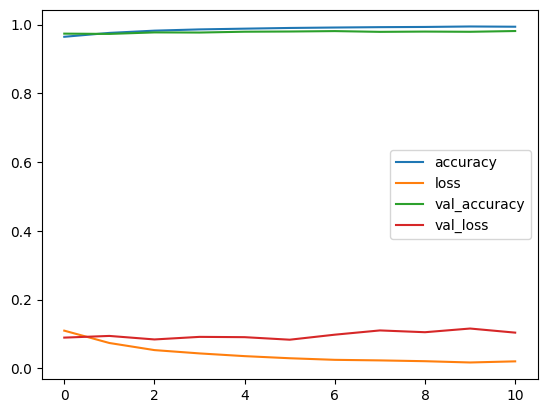

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.0914


[0.07686973363161087, 0.9771999716758728]

In [39]:
x_new = X_test[:3]
# x_new

In [40]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [41]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [42]:
y_prob

array([[1.2502895e-05, 6.1277336e-07, 2.2266248e-04, 2.0095248e-04,
        5.5893290e-09, 2.1337844e-07, 5.3838158e-12, 9.9954659e-01,
        3.1439633e-06, 1.3314595e-05],
       [5.1537108e-06, 2.0129506e-05, 9.9978262e-01, 1.8377909e-04,
        8.0083284e-12, 7.6228486e-07, 6.5043872e-07, 5.1209162e-11,
        6.9855960e-06, 9.4433732e-12],
       [1.6243803e-05, 9.9617982e-01, 5.6114816e-04, 7.0319977e-05,
        6.7270739e-04, 1.0828888e-04, 7.7980665e-05, 1.4019277e-03,
        8.8468101e-04, 2.6831100e-05]], dtype=float32)

In [43]:
y_pred = np.argmax(y_prob, axis = -1)

In [44]:
y_pred

array([7, 2, 1])

In [45]:
actual

array([7, 2, 1], dtype=uint8)

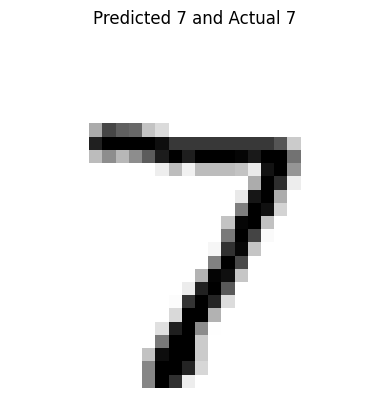

######################


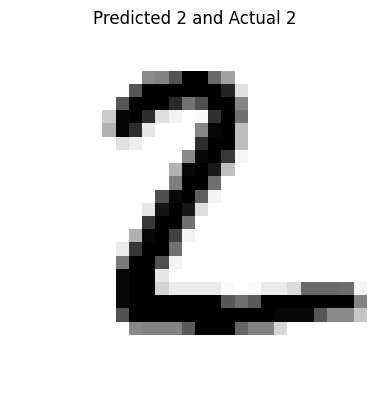

######################


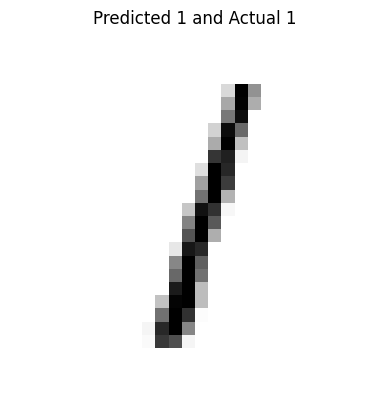

######################


In [46]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")